#   SciPy

# Solving Definite Integrals

In [3]:
import scipy
from scipy import integrate

In [4]:
# 1
f = lambda x: x**2 + 1
y, abserr = scipy.integrate.quad(f, 0, 2)
print("The numerical result is {:f} (+-{:g})".format(y, abserr))

The numerical result is 4.666667 (+-5.18104e-14)


In [5]:
# 2
f_1 = lambda x : x**2 + x **(-2)
y_1, abserr_1 = scipy.integrate.quad(f_1, 1, 2)
print("The numerical result is {:f} (+-{:g})".format(y_1, abserr_1))

The numerical result is 2.833333 (+-3.14563e-14)


In [6]:
# 3
f_2 = lambda x : 6*(x**2) - 5*x + 2
y_2, abserr_2 = scipy.integrate.quad(f_2, -3, 1)
print("The numerical result is {:f} (+-{:g})".format(y_2, abserr_2))

The numerical result is 84.000000 (+-9.32587e-13)


# Curve Fitting

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [8]:
np.random.seed(0)

In [9]:
x_data = np.linspace(-6, 6, 50)
y_data = 3 * np.sin(1.5 * x_data) + np.random.normal(size=50)

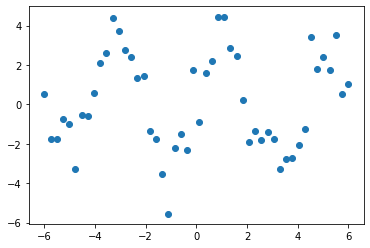

In [10]:
plt.scatter(x_data, y_data)

In [13]:
from math import *
def func(x, a, b):
    return (a * sin(b * x))
func2 = np.vectorize(func)

In [14]:
popt, pcov = curve_fit(func2, x_data, y_data, p0 = [2, 2])

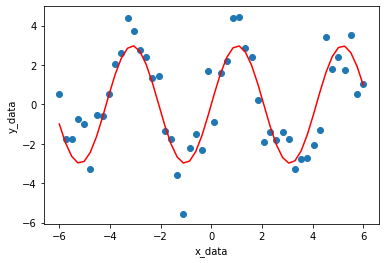

In [15]:
plt.scatter(x_data, y_data)
plt.plot(x_data, func2(x_data, *popt), color='red')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

# Image Processing

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
cow_image = Image.open('pictures/cow.jpg')

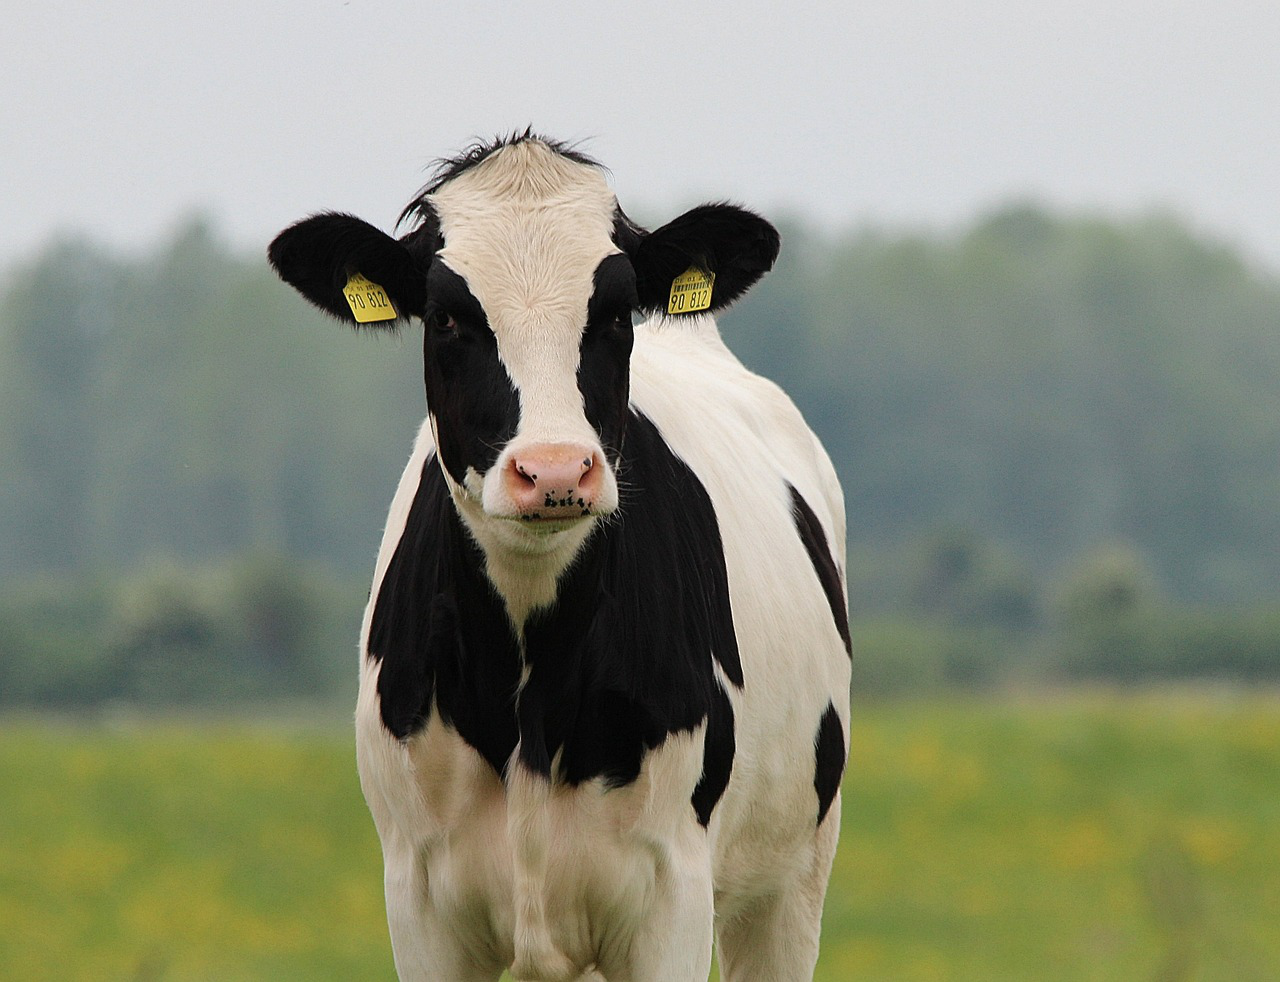

In [18]:
cow_image

In [19]:
img = cow_image.convert('LA')

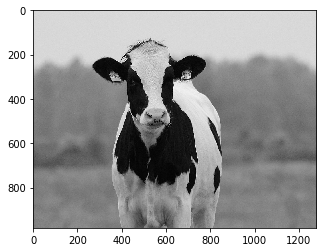

In [20]:
plt.imshow(img)

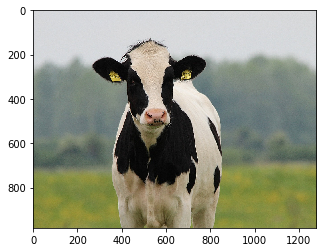

In [21]:
plt.imshow(cow_image)

In [22]:
type(cow_image)

PIL.JpegImagePlugin.JpegImageFile

In [23]:
img_arr = np.array(cow_image) 
print(img_arr)

[[[212 213 215]
  [212 213 215]
  [213 214 216]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[215 216 218]
  [214 215 217]
  [215 216 218]
  ...
  [218 218 218]
  [218 218 218]
  [218 218 218]]

 [[216 217 219]
  [216 217 219]
  [215 216 218]
  ...
  [218 218 218]
  [218 218 218]
  [217 217 217]]

 ...

 [[131 134  53]
  [131 134  53]
  [134 137  56]
  ...
  [135 145  72]
  [135 145  72]
  [134 144  71]]

 [[136 139  58]
  [134 137  56]
  [135 138  57]
  ...
  [134 144  71]
  [134 144  71]
  [133 144  68]]

 [[140 141  61]
  [137 138  58]
  [137 138  58]
  ...
  [134 144  71]
  [133 143  70]
  [133 144  68]]]


In [24]:
img_arr.shape

(982, 1280, 3)

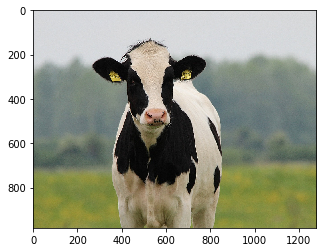

In [25]:
plt.imshow(img_arr)

In [26]:
cowimage = img_arr.mean(axis=2)
cowimage.shape

(982, 1280)

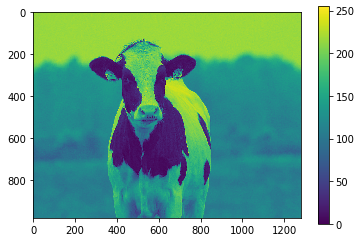

In [27]:
plt.imshow(cowimage);
plt.colorbar()

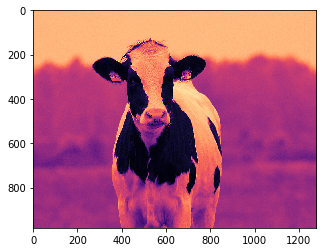

In [28]:
plt.imshow(cowimage, cmap='magma')

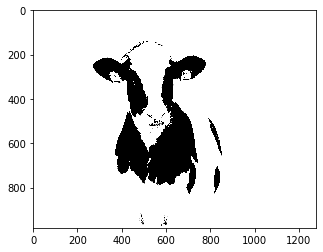

In [29]:
plt.imshow(cowimage, cmap='gray', vmin=50, vmax=60)

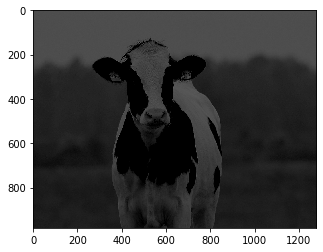

In [30]:
plt.imshow(cowimage, cmap='gray', vmin=50, vmax=600)

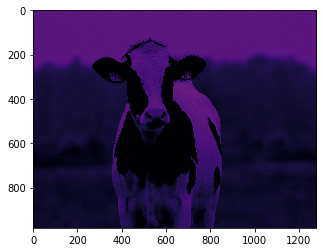

In [31]:
plt.imshow(cowimage, cmap='magma',vmax=600, vmin=70)

In [32]:
cowimage.shape

(982, 1280)

In [33]:
x1 = 0
y1 = 0
x2 = cow_image.width-500
y2 = cow_image.height - 300
cropped = cow_image.crop((x1, y1, x2, y2))

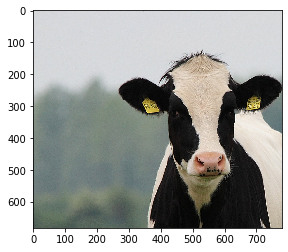

In [34]:
plt.imshow(cropped)

In [35]:
# Another example of cropping
xcenter = cow_image.width/2
ycenter = cow_image.height/2
x_1 = xcenter - 250
y_1 = ycenter - 300
x_2 = xcenter + 10
y_2 = ycenter + 100
cropped_1 = cow_image.crop((x_1, y_1, x_2, y_2))

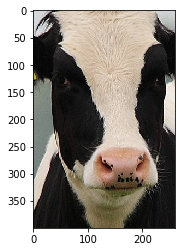

In [36]:
plt.imshow(cropped_1)

In [38]:
from scipy import ndimage
from scipy.ndimage import gaussian_filter

In [39]:
img_arr

array([[[212, 213, 215],
        [212, 213, 215],
        [213, 214, 216],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [217, 217, 217]],

       [[215, 216, 218],
        [214, 215, 217],
        [215, 216, 218],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       [[216, 217, 219],
        [216, 217, 219],
        [215, 216, 218],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [217, 217, 217]],

       ...,

       [[131, 134,  53],
        [131, 134,  53],
        [134, 137,  56],
        ...,
        [135, 145,  72],
        [135, 145,  72],
        [134, 144,  71]],

       [[136, 139,  58],
        [134, 137,  56],
        [135, 138,  57],
        ...,
        [134, 144,  71],
        [134, 144,  71],
        [133, 144,  68]],

       [[140, 141,  61],
        [137, 138,  58],
        [137, 138,  58],
        ...,
        [134, 144,  71],
        [133, 143,  70],
        [133, 144,  68]]

In [40]:
gaussian_filter(img_arr, sigma=1)

array([[[212, 213, 214],
        [212, 213, 214],
        [213, 214, 215],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [217, 217, 217]],

       [[213, 214, 215],
        [213, 214, 215],
        [213, 214, 215],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [217, 217, 217]],

       [[214, 215, 216],
        [214, 215, 216],
        [214, 215, 216],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       ...,

       [[127, 110,  82],
        [127, 110,  82],
        [128, 111,  83],
        ...,
        [131, 118,  95],
        [132, 119,  95],
        [132, 119,  95]],

       [[129, 112,  84],
        [129, 111,  84],
        [129, 111,  84],
        ...,
        [131, 118,  95],
        [131, 118,  95],
        [131, 118,  94]],

       [[131, 113,  86],
        [131, 113,  85],
        [130, 112,  84],
        ...,
        [131, 118,  95],
        [131, 118,  94],
        [131, 117,  94]]

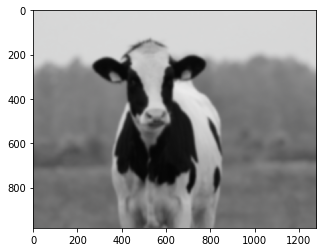

In [41]:
blurred = ndimage.gaussian_filter(cow_image, sigma=5)
plt.imshow(blurred)

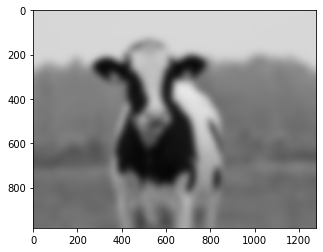

In [43]:
very_blurred = ndimage.gaussian_filter(cow_image, sigma=15)
plt.imshow(very_blurred)